**Transfer Learning**


* Keras contains pretrained models for image classification which are trained on Imagenet data. 
* Imagenet is a large collection of image data containing 1000 categories of images. 
* These pretrained models are capable of classifying any image that falls into these 1000 categories of images.


https://keras.io/api/applications/

[Sport Celebrity Image Classification](https://www.kaggle.com/datasets/yaswanthgali/sport-celebrity-image-classification)

Data contain around 100 images of each celebrity namely Kobe, Kane, Maria, and Ronaldo.


**Maria Sharapova:** Maria Yuryevna Sharapova is a Russian former world No. 1 tennis player.<br/>
**Kobe Bryant:** Kobe Bean Bryant was an American professional basketball player.<br/>
**Kane Williamson:** Kane Stuart Williamson is a New Zealand international cricketer who is currently the captain of the New Zealand national team in all formats.<br/>
**Cristiano Ronaldo:** Cristiano Ronaldo is a Portuguese professional footballer.<br/>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/ComputerVision_Shared/CNN_Code/'

Image_Classification_using_CNN.ipynb  my_model.h5
Load_Saved_model.ipynb		      Sports_Celebrity_Data


In [ ]:
dataset_path = '/content/drive/My Drive/ComputerVision_Shared/CNN_Code/Sports_Celebrity_Data/'

In [ ]:
seed_value= 0

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

import cv2

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

**Load the Data**

In [ ]:
# lists to hold data

images = []
labels = []

In [ ]:
# listing all folder names in the specified path
folders = os.listdir(dataset_path)
folders

['Maria Sharapova', 'Kobe Bryant', 'Ronaldo', 'Kane Williamson']

In [ ]:
# Creating dictionaries to map folder names

name_mapping_dict = {'Maria Sharapova': 0,
                     'Kobe Bryant': 1,
                     'Ronaldo': 2,
                     'Kane Williamson': 3}


inv_name_mapping_dict =  {v: k for k, v in name_mapping_dict.items()}

print(inv_name_mapping_dict)

{0: 'Maria Sharapova', 1: 'Kobe Bryant', 2: 'Ronaldo', 3: 'Kane Williamson'}


In [ ]:
# Setting image size
img_size = 224

**Pre-process dataset**

In [ ]:
# looping through each folder and getting images and creating labels
for folder in folders:
  print(f'Processing folder: {folder}')
  filenames = os.listdir(dataset_path+folder+'/')

  for fname in filenames:
    img = plt.imread(dataset_path+folder+'/'+fname)
    img = cv2.resize(img, (img_size, img_size))
    images.append(img)
    labels.append(name_mapping_dict[folder])

Processing folder: Maria Sharapova
Processing folder: Kobe Bryant
Processing folder: Ronaldo
Processing folder: Kane Williamson


In [ ]:
# Converting lists to numpy arrays for easy matrix operations
images = np.array(images)
labels = np.array(labels)

In [ ]:
print('images shape : ', images.shape)
print('labels shape : ', labels.shape)

images shape :  (441, 224, 224, 3)
labels shape :  (441,)


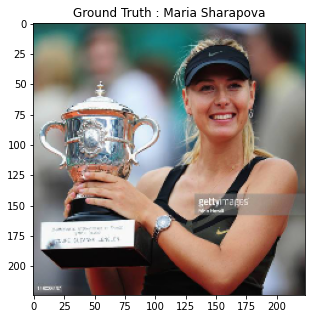

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 65
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

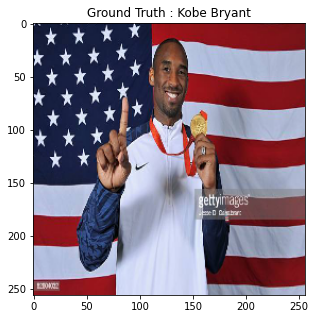

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 207
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

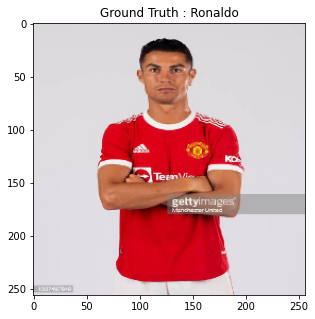

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 306
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

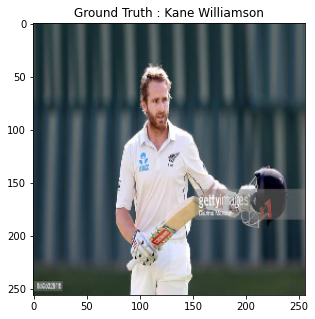

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 406
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(labels)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

Total number of outputs :  4
Output classes :  [0 1 2 3]


In [ ]:
# Normalize training image pixels
images = np.array(images) / 255

In [ ]:
# Change the labels from integer to categorical data
labels_one_hot = to_categorical(labels)

In [ ]:
labels[303]

2

In [ ]:
labels_one_hot[303]

array([0., 0., 1., 0.], dtype=float32)

**Shuffling and Splittng Dataset**

In [ ]:
# Shuffling and Splittng Dataset
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labels_one_hot, test_size=0.10, shuffle=True, random_state=0)


print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (396, 224, 224, 3) (396, 4)
Testing data shape :  (45, 224, 224, 3) (45, 4)


**Design the Network Architecure for Convolutional Neural Network**


* Getting a pretrained Feature Extractor
* Removing its Fully-Connected layers and attaching our own (To exclude the default classifier we have to set argument include_top to false)

Attaching our own classifier

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

#pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False)
#pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=(img_size, img_size, 3))
#pretrained_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
#pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=(img_size, img_size, 3))
pretrained_model.trainable = False

model = Sequential()
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(classes_num, activation="softmax"))

58900480/58889256 [==============================] - 1s 0us/step




**Configure the model training time parameters**

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Train the Model**

In [ ]:
history = model.fit(train_images, train_labels, batch_size=64,  epochs=10, verbose=1, 
                   validation_data=(test_images, test_labels))

Epoch 1/10
7/7 [==============================] - 199s 28s/step - loss: 1.9248 - accuracy: 0.3485 - val_loss: 1.4653 - val_accuracy: 0.4444
Epoch 2/10
7/7 [==============================] - 193s 27s/step - loss: 0.8551 - accuracy: 0.6768 - val_loss: 1.3008 - val_accuracy: 0.4667
Epoch 3/10
7/7 [==============================] - 199s 28s/step - loss: 0.5007 - accuracy: 0.8460 - val_loss: 1.0419 - val_accuracy: 0.5778
Epoch 4/10
7/7 [==============================] - 194s 28s/step - loss: 0.2697 - accuracy: 0.9242 - val_loss: 1.1588 - val_accuracy: 0.5778
Epoch 5/10
7/7 [==============================] - 194s 28s/step - loss: 0.1468 - accuracy: 0.9747 - val_loss: 0.9362 - val_accuracy: 0.6889
Epoch 6/10
7/7 [==============================] - 196s 28s/step - loss: 0.0973 - accuracy: 0.9899 - val_loss: 1.0038 - val_accuracy: 0.6000
Epoch 7/10
7/7 [==============================] - 193s 28s/step - loss: 0.0624 - accuracy: 1.0000 - val_loss: 0.9328 - val_accuracy: 0.6667
Epoch 8/10
7/7 [====

**Evaluate the Trained Model on Testing Data**

In [ ]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc*100))

2/2 [==============================] - 20s 6s/step - loss: 0.8829 - accuracy: 0.7111
Evaluation result on Test Data : Loss = 0.8829247355461121, accuracy = 71.11111283302307


In [ ]:
[train_loss, train_acc] = model.evaluate(train_images, train_labels)
print("Evaluation result on train Data : Loss = {}, accuracy = {}".format(train_loss, train_acc*100))

13/13 [==============================] - 185s 14s/step - loss: 0.0275 - accuracy: 1.0000
Evaluation result on train Data : Loss = 0.027538208290934563, accuracy = 100.0


**Save Trained Model**

In [ ]:
model_path = '/content/drive/My Drive/ComputerVision_Shared/Transfer_Learning_Code/'

model.save(model_path+'TL_model.h5')

**Display Loss and Accuracy Plots**

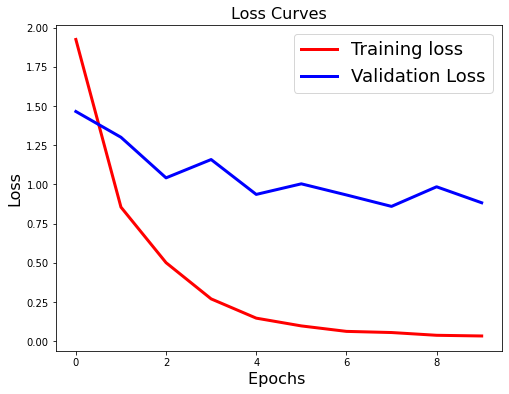

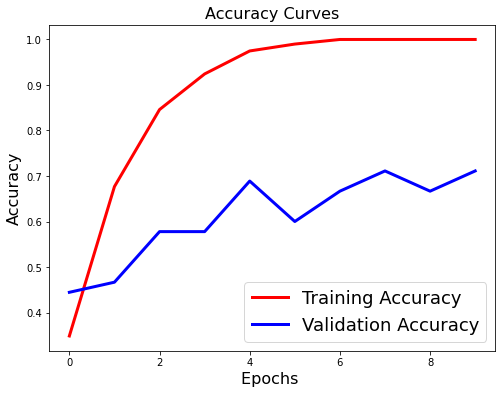

In [ ]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

**Test the Trained Model on Testing Data: <br/>Testing a single image**

Model prediction: Kane Williamson


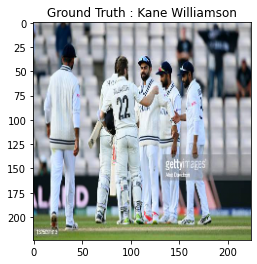

In [ ]:
# Predict the most likely class
test_img_number = 7

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Maria Sharapova


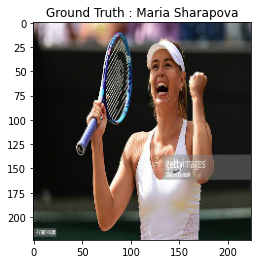

In [ ]:
# Predict the most likely class
test_img_number = 20

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Maria Sharapova


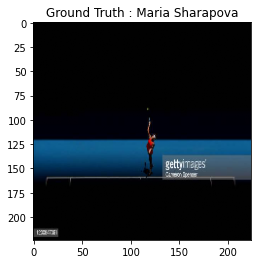

In [ ]:
# Predict the most likely class
test_img_number = 15

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Ronaldo


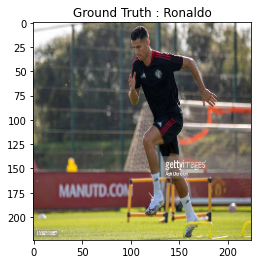

In [ ]:
# Predict the most likely class
test_img_number = 2

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Ronaldo


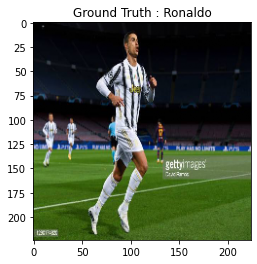

In [ ]:
# Predict the most likely class
test_img_number = 34

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Kobe Bryant


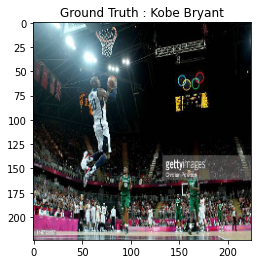

In [ ]:
# Predict the most likely class
test_img_number = 40

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Kane Williamson


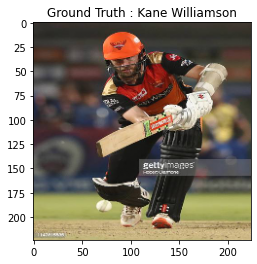

In [ ]:
# Predict the most likely class
test_img_number = 3

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Ronaldo


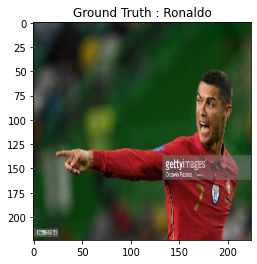

In [ ]:
# Predict the most likely class
test_img_number = 12

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Kane Williamson


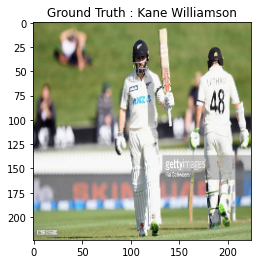

In [ ]:
# Predict the most likely class
test_img_number = 44

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Kane Williamson


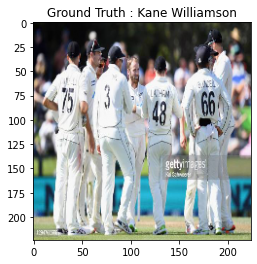

In [ ]:
# Predict the most likely class
test_img_number = 30

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Ronaldo


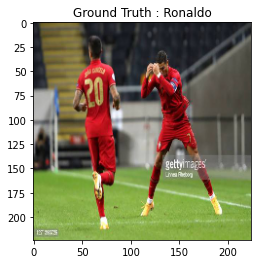

In [ ]:
# Predict the most likely class
test_img_number = 14

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Kobe Bryant


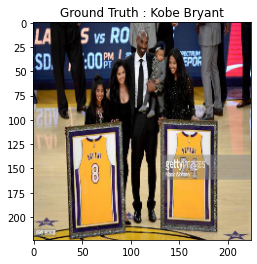

In [ ]:
# Predict the most likely class
test_img_number = 29

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: Maria Sharapova


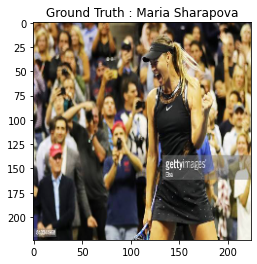

In [ ]:
# Predict the most likely class
test_img_number = 25

prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()